### Interest Rate Predictions

Predict Interest Rates in Portugal using Historical Data:
    - Average Bank Deposit Rate
    - Average Bank Loan Rate
    - Average Mortgage Rate
    - Other?

In [94]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [95]:
os.listdir('data')

['daily_euribor3m.csv',
 '08-01-19 01_58_10_theglobaleconomy.csv',
 'data_ready.pickle',
 '08-01-19 01_55_17_theglobaleconomy.csv',
 'bank-additional-full.csv']

In [96]:
df1 = pd.read_csv('data/08-01-19 01_58_10_theglobaleconomy.csv')

In [97]:
df2 = pd.read_csv('data/08-01-19 01_55_17_theglobaleconomy.csv')

In [98]:
df = df1.merge(df2, on = ['Year', 'Month'], how='inner')

In [99]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(36, 42)
(36, 20)
(36, 24)


In [100]:
#backfilling values for quarterly indicators
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.fillna(method='bfill')

In [101]:
#Cleaning up column names
df.drop(columns=['Country_x', 'Code_x'], inplace=True)
df.rename(columns={'Country_y':'Country', 'Code_y':'Code'}, inplace=True)

In [102]:
df.head()

Year  Month   Consumer credit   Deposit interest rate  \
0  2008      1             26.75                    4.00   
1  2008      2             26.87                    3.95   
2  2008      3             27.10                    4.00   
3  2008      4             27.27                    4.13   
4  2008      5             27.35                    4.19   

    Mortgage credit interest rate   Business credit interest rate  \
0                            5.27                            6.68   
1                            5.12                            6.26   
2                            5.05                            6.41   
3                            5.27                            6.68   
4                            5.45                            6.80   

    Employment   Unemployment rate    Current account balance   Exports  \
0         4.94                  8.8                  -1599.18   4650.82   
1         4.94                  8.8                  -1935.02   4626.80   
2         4.95                  8.8                  -1718.69   4688.77   
3         4.97                  8.5                  -2027.50   4867.78   
4         4.98                  8.4                  -2102.80   4906.96   

            ...             Consumption growth   Investment as percent of GDP  \
0           ...                           6.77                          23.19   
1           ...                           6.77                          23.19   
2           ...                           6.77                          23.19   
3           ...                           5.12                          23.32   
4           ...                           5.12                          23.32   

   Investment growth  Consumption as percent of GDP  Inflation monthly  \
0               6.76                          64.25              -0.13   
1               6.76                          64.25               0.01   
2               6.76                          64.25               1.48   
3               9.55                           64.6               0.31   
4               9.55                           64.6               0.44   

    Inflation annual   Retail sales  Business confidence survey  \
0               2.83          117.0                        3.79   
1               2.86          119.9                        2.84   
2               3.10          116.8                        3.86   
3               2.48          116.7                        2.32   
4               2.78          116.9                        0.11   

   Consumer confidence survey  Economic growth Q-on-Q  
0                       -34.9                    0.03  
1                       -32.9                    0.03  
2                       -32.5                    0.03  
3                       -31.5                   -0.51  
4                       -28.5                   -0.51  

[5 rows x 40 columns]

In [103]:
df.columns

Index(['Year', 'Month', ' Consumer credit', ' Deposit interest rate',
       ' Mortgage credit interest rate', ' Business credit interest rate',
       ' Employment', ' Unemployment rate ', ' Current account balance',
       ' Exports', ' FDI', ' Foreign exchange reserves',
       ' Government expenditure', ' Budget balance', ' Labor cost',
       ' Exchange rate to USD', ' Minimum wage', ' Government debt ',
       'Country', 'Code', ' Private sector credit', ' Business credit',
       ' Household credit', ' Mortgage credit',
       ' Gross Domestic Product (GDP)', ' Consumer Price Index (CPI)',
       ' Money supply (broad money)', ' Household consumption', ' Investment',
       ' Economic growth ', ' Consumption growth',
       ' Investment as percent of GDP', ' Investment growth',
       ' Consumption as percent of GDP', ' Inflation monthly',
       ' Inflation annual', ' Retail sales', ' Business confidence survey',
       ' Consumer confidence survey', ' Economic growth Q-on-Q'],

In [104]:
cons_credit_y = df[' Consumer credit'].shift(1)
cons_credit_x = df[' Consumer credit']

In [105]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

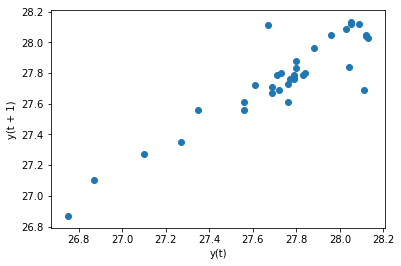

In [106]:
lag_plot(df[' Consumer credit'])
plt.show()

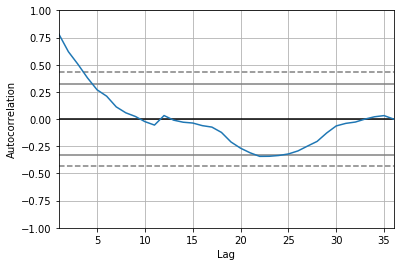

In [107]:
autocorrelation_plot(df[' Consumer credit'])
plt.show()

In [122]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [109]:
cons_credit_x.shape

(36,)

In [110]:
train, test = cons_credit_x[1:len(cons_credit_x)-8], cons_credit_x[len(cons_credit_x)-8:]

In [111]:
train = np.array(train)
test = np.array(test)

In [112]:
#Fitting ARMA Model
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 9
Coefficients: [ 8.87627686e+00  3.09356175e-01  2.27076864e-01  3.09589521e-01
  4.06541381e-02 -1.36005290e-01 -8.01256788e-03 -2.75523813e-01
  6.11322160e-02  1.54529317e-01]


In [114]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 

In [115]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i])) 
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=28.021078, expected=28.120000
predicted=28.013378, expected=28.040000
predicted=27.972440, expected=27.840000
predicted=27.988017, expected=27.800000
predicted=27.978978, expected=27.830000
predicted=27.951175, expected=27.790000
predicted=27.975351, expected=27.760000
predicted=27.988307, expected=27.610000
Test RMSE: 0.194


In [ ]:
plt.plot(test)
plt.plot(predictions, color='red') 
plt.show()

In [117]:
#Fitting rolling forecast ARIMA model

In [118]:
size = int(len(cons_credit_x) * 0.66)
train, test = cons_credit_x[0:size], cons_credit_x[size:len(cons_credit_x)]
history = [x for x in train]
predictions = list()

In [120]:
train = np.array(train)
test = np.array(test)

In [123]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` 

predicted=28.117589, expected=28.130000
predicted=28.205125, expected=28.030000
predicted=28.161526, expected=28.090000
predicted=28.152911, expected=28.120000
predicted=28.133855, expected=28.050000
predicted=28.119639, expected=28.120000
predicted=28.159273, expected=28.040000
predicted=28.082111, expected=27.840000
predicted=27.923641, expected=27.800000
predicted=27.771755, expected=27.830000
predicted=27.737242, expected=27.790000
predicted=27.782299, expected=27.760000
predicted=27.793387, expected=27.610000


In [125]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions)) 
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.115


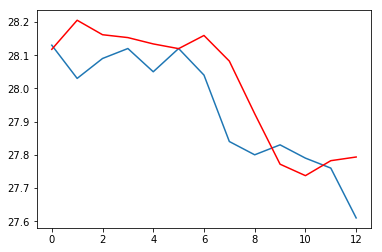

In [128]:
plt.plot(test)
plt.plot(predictions, color='red') 
plt.show()

In [ ]:
#enhancement: upsample to daily rate to obtain higher profitability